1. Load data
2. Preprocess data
3. Build network
4. **Train**
5. Test

Step four: train the network.

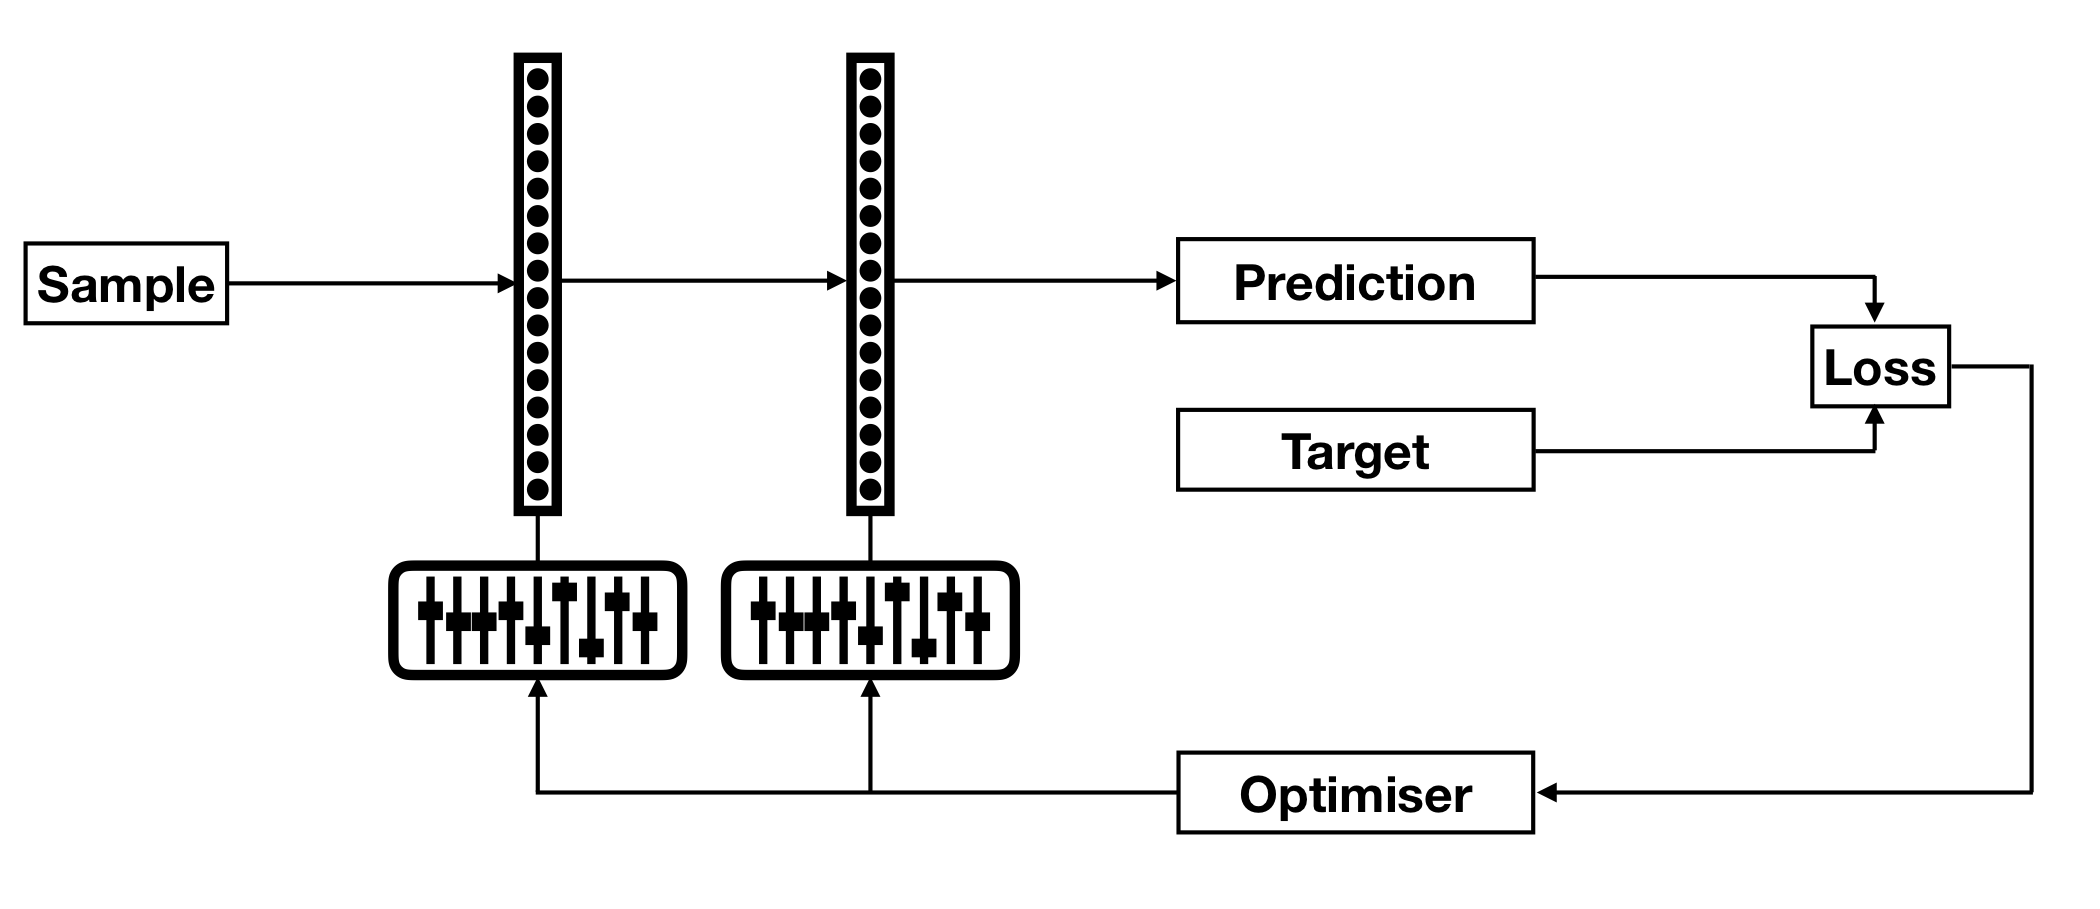

Here is our picture of neural network training. The optimiser - `rmsprop`- tweaks layer parameters (weights and biases). The sliders are adjusted in an attempt to lower the loss - the discrepancy between prediction and target.

In [1]:
# the program so far

# load
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# preprocess
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# build
from tensorflow.keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', 
                metrics=['accuracy']) 

Here is the program so far with load, preprocess and build code chunks.

We have to decide:

- the number of samples processed in a single pass of the training algorithm - the **mini-batch size** 

- the number of complete passes through the entire training set - the number of **epochs**

We have to decide on the number of samples processed in a single pass of the training algorithm - the **mini-batch size** and the number of complete passes through the entire training set - the number of **epochs**. Again, bear with me, these terms will be explained shortly.

In [2]:
# training - fit to input data
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2570 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1028 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0667 - accuracy: 0.9805
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0493 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0365 - accuracy: 0.9890


Training is launched by a call to `fit`. `fit` has several arguments: references to the training sample and label data objects, and the `epochs` and `batch_size` settings. 

[RUN]

Monitoring information is printed at the end of each epoch. The optimser is trying to get the loss down to 0 and we see that loss is indeed decreasing. The accuracy - the number of correctly classified samples, slowly increases during training.

Training over. The optimiser has tweaked layer weights and biases - the mixer desk sliders - and achieved a very high accuracy. The network correctly recognises almost 99% of the images. But, for reasons that we will discuss at length later on, this does not mean that the network performs with 99% accuracy on unseen data. And that is the point of training - to automatically identify new input. For example, in automatic letter sorting. The network has to be 'tested'. 